In [4]:
import numpy as np
from sklearn.decomposition import PCA
from read_cifar import load_cifar
from matplotlib import pyplot as plt
from tqdm import tqdm

In [5]:
# load in the dataset
training_data, test_data = load_cifar()
label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [12]:
def vectorized_images(training_data, normalize=True):
    # vectorize the training data
    vectorized_training_data = training_data.reshape(training_data.shape[0], -1)

    if normalize:
        # normalize the training data
        vectorized_training_data = vectorized_training_data / 255
    return vectorized_training_data

vectorized_training_data = vectorized_images(training_data["data"])

In [126]:
# perform PCA
PCA_model = PCA()
PCA_model.fit(vectorized_training_data)

PCA()

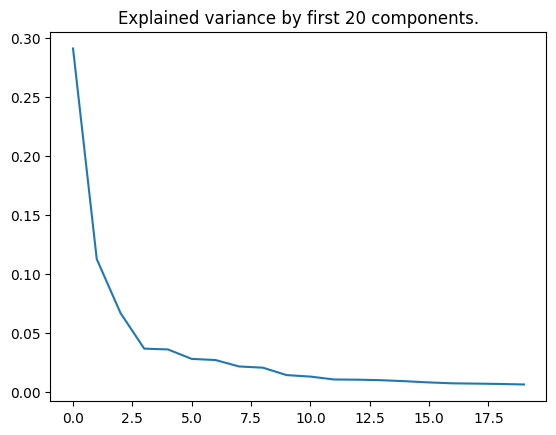

In [127]:
# eigenvalues
NUMBER_OF_COMPONENTS = 20
eigenvalues = PCA_model.explained_variance_
eigenvalues_normalized = eigenvalues/np.sum(eigenvalues)

plt.title(f"Explained variance by first {NUMBER_OF_COMPONENTS} components.")
plt.plot(eigenvalues_normalized[:NUMBER_OF_COMPONENTS])

In [ ]:
from PIL import Image

'''
We were not sure if the pictures were supposed to be plotted in color or black and white. We provided both options.
Also, since the pillow library was made available to us, we tried to utilize it. 
'''

# help function for converting images to gray scale using Pillow
def convert_to_gray_pillow(im, normalize=True):
    im = (im * 255).astype(np.uint8)
    im = np.asarray(Image.fromarray(im, mode="RGB").convert("L"))
    if normalize:
        im = im / 255
    return im

# help function for converting images to gray scale using tensor multiplication (it's automatically normalized)
def convert_to_gray_tensor(im):
    weights = np.array([0.2989, 0.5870, 0.1140]) # luminance
    converted_image = np.tensordot(im, weights, axes=([-1], [0]))
    return converted_image


def plot_im(im, ax=None, title=None, max_contrast=0.0, gray=None):
    """
    Plot a normalized image.
    
    Parameters
    ----------
    
    im: (1250,) array-like
    """
    assert max_contrast >= 0.0 and max_contrast < 1.0

    vmin = - max_contrast / 2
    vmax = max_contrast / 2
    
    
    if gray != None:
        if gray=="pillow":
            im = convert_to_gray_pillow(im, normalize=True)
        elif gray =="tensor":
            im = convert_to_gray_tensor(im)
        else:
            raise ValueError(f"Incorrect value for the gray parameter. Correct values: False, 'tensor', 'pillow'.")
        
    if ax != None:
        ax.imshow(im, cmap="gray", vmin = vmin, vmax = vmax)
        ax.set_title(title)
        ax.axis('off')
    else:
        plt.imshow(im)

def plot_five_eigenvectors(
        eigenpedestrians: np.ndarray, 
        index_min: int, 
        index_max: int,
        max_contrast = False
):

    nrows = int((index_max - index_min) / 5)
    ncols = 5
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,10))
    # for i in range(nrows):
    #     axs[i, 0].set_title["bees"]
    print(axs.shape)
    axs = axs.flatten()
    axs[2].set_title("abs")
    # axs.set_title["bear"]
    
    

    
    for i in range(index_min, index_max):
        plot_im(eigenpedestrians[i], axs[i-index_min], max_contrast=max_contrast)

    plt.show()

import matplotlib.pyplot as plt
import numpy as np


In [196]:
def sort_by_labels(training_data, training_labels):    
    # we no consider the data for all labels separately
    images_vectorized = vectorized_images(training_data)
    labels = np.array(training_labels)

    all_categories = list(range(0,10))
    data_by_labels = {}
    for i in all_categories:
        data_by_labels[label_names[i]] = images_vectorized[labels==i]
    return data_by_labels

data_by_labels = sort_by_labels(training_data["data"], training_data["labels"])

In [ ]:
def plot_five_eigenvectors_with_names(
        eigenvectors: np.ndarray, 
        index_min: int, 
        index_max: int,
        max_contrast = False,
        gray = True
):
    ncols = 5
    n_images = index_max - index_min
    nrows = int(np.ceil(n_images / ncols))
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 2.5 * nrows))
    axs = np.array(axs).reshape(nrows, ncols)


    for idx in range(n_images):
        row = idx // ncols
        col = idx % ncols
        if gray:
            plot_im(eigenvectors[row][idx % 5].reshape(-1, 32, 32)[0], axs[row, col], max_contrast=max_contrast)
        else:
            plot_im(eigenvectors[row][idx % 5], axs[row, col], max_contrast=max_contrast)


    # Remove unused axes
    for idx in range(n_images, nrows * ncols):
        fig.delaxes(axs[idx // ncols, idx % ncols])

    # Add a title per row (centered above each row)
    row_titles = [f'5 first eigenvectors for {label_names[i]}' for i in range(nrows)]
    for row in range(nrows):
        # Get x coordinates of left and right ends of the row
        ax_left = axs[row, 0]
        ax_right = axs[row, -1]
        # Get average x-position between first and last column of that row
        xmid = (ax_left.get_position().x0 + ax_right.get_position().x1) / 2
        y = ax_left.get_position().y1 + 0.01  # a bit above the top of the row
        fig.text(xmid, y, row_titles[row], ha='center', va='bottom', fontsize=12)

    plt.show()


def run_PCA_each_label(data_by_labels: dict, number_of_eigenvectors: int, gray = False):
    all_eigenvectors = []
    for i in tqdm(data_by_labels.keys()):
        PCA_model = PCA(number_of_eigenvectors)
        PCA_model.fit(data_by_labels[i])
        eigenvectors = PCA_model.components_ + PCA_model.mean_
        if gray:
            eigenvectors_reshaped = eigenvectors.reshape(-1, 32, 32)
        else:
            eigenvectors_reshaped = eigenvectors.reshape(-1, 32, 32, 3)
        
        all_eigenvectors.append((eigenvectors_reshaped))

    return all_eigenvectors


In [200]:
all_eigenvectors = run_PCA_each_label(data_by_labels, 5, gray = False)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:05<00:00,  1.67it/s]


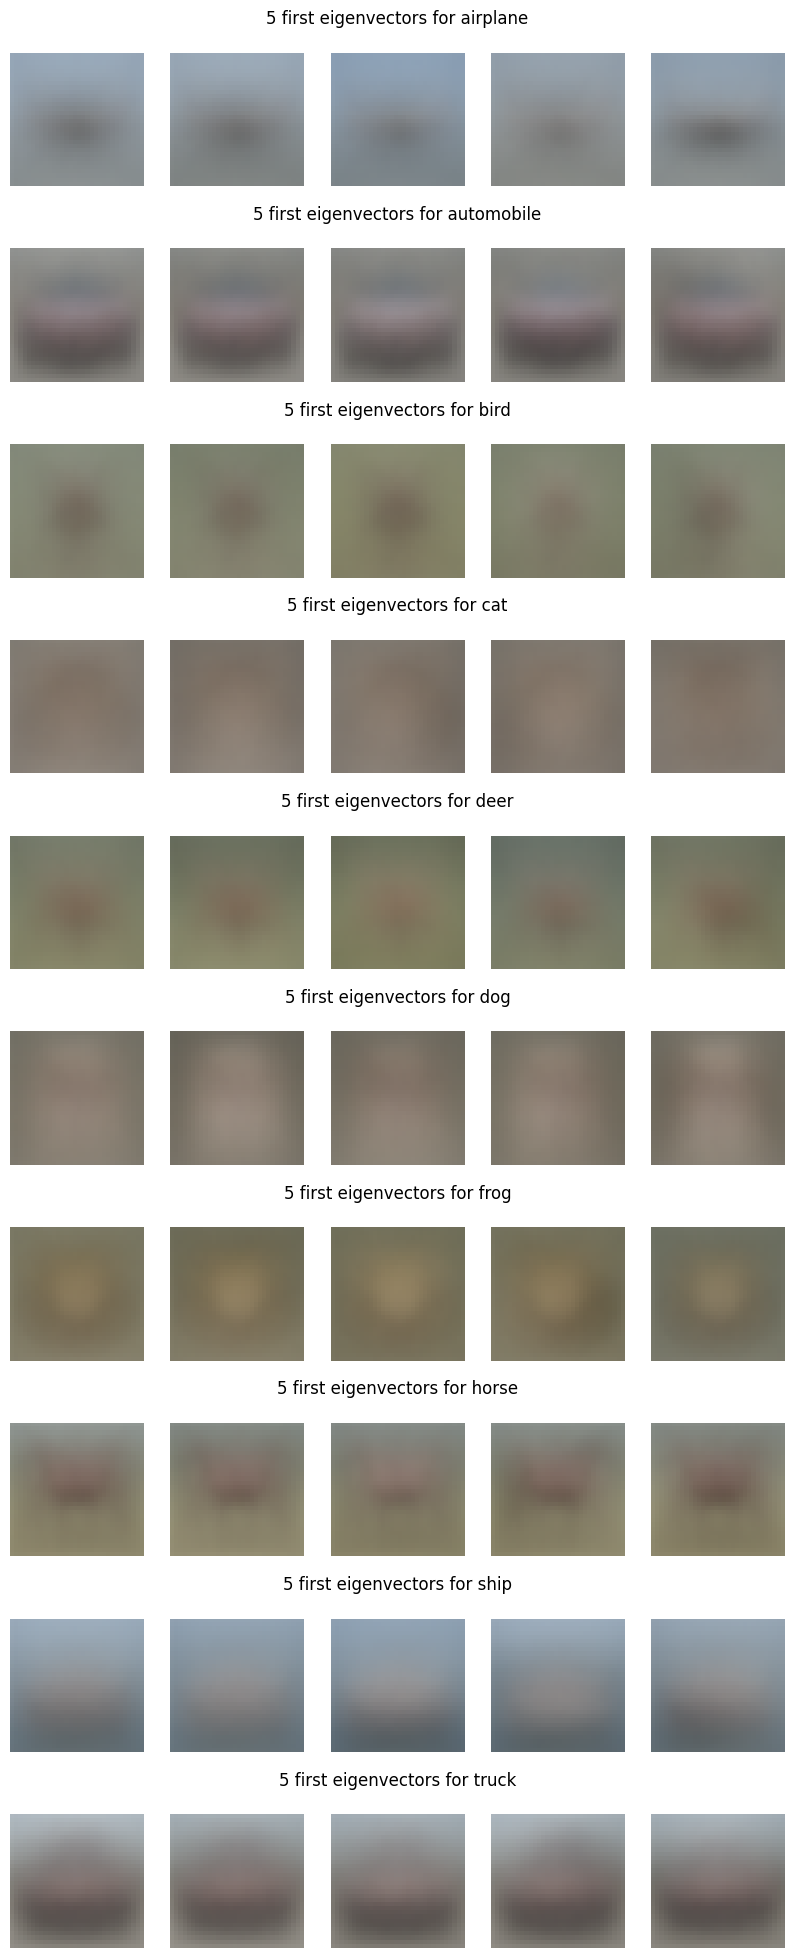

In [ ]:
plot_five_eigenvectors_with_names(all_eigenvectors, 0, 50, gray=False)

PCA does not provide a good visualisation when we take all the data in the colorful case.

In [203]:
# we will try some visualisations using the gray scale
# first we convert the images to the gray scale
training_data["data"][0]

def convert_to_gray_tensor(im):
    weights = np.array([0.2989, 0.5870, 0.1140]) # luminance
    converted_image = np.tensordot(im, weights, axes=([-1], [0]))
    return converted_image

# covnert to gray scale
training_data_gray = convert_to_gray_tensor(training_data["data"])

# vectorize the grayscale images
training_data_gray_vectorized = vectorized_images(training_data_gray)


In [220]:
# we repeat the same as before
data_gray_by_labels = sort_by_labels(training_data_gray_vectorized, training_data["labels"])
all_eigenvectors_gray = run_PCA_each_label(data_gray_by_labels, 10, gray=True)

100%|██████████| 10/10 [00:03<00:00,  2.69it/s]


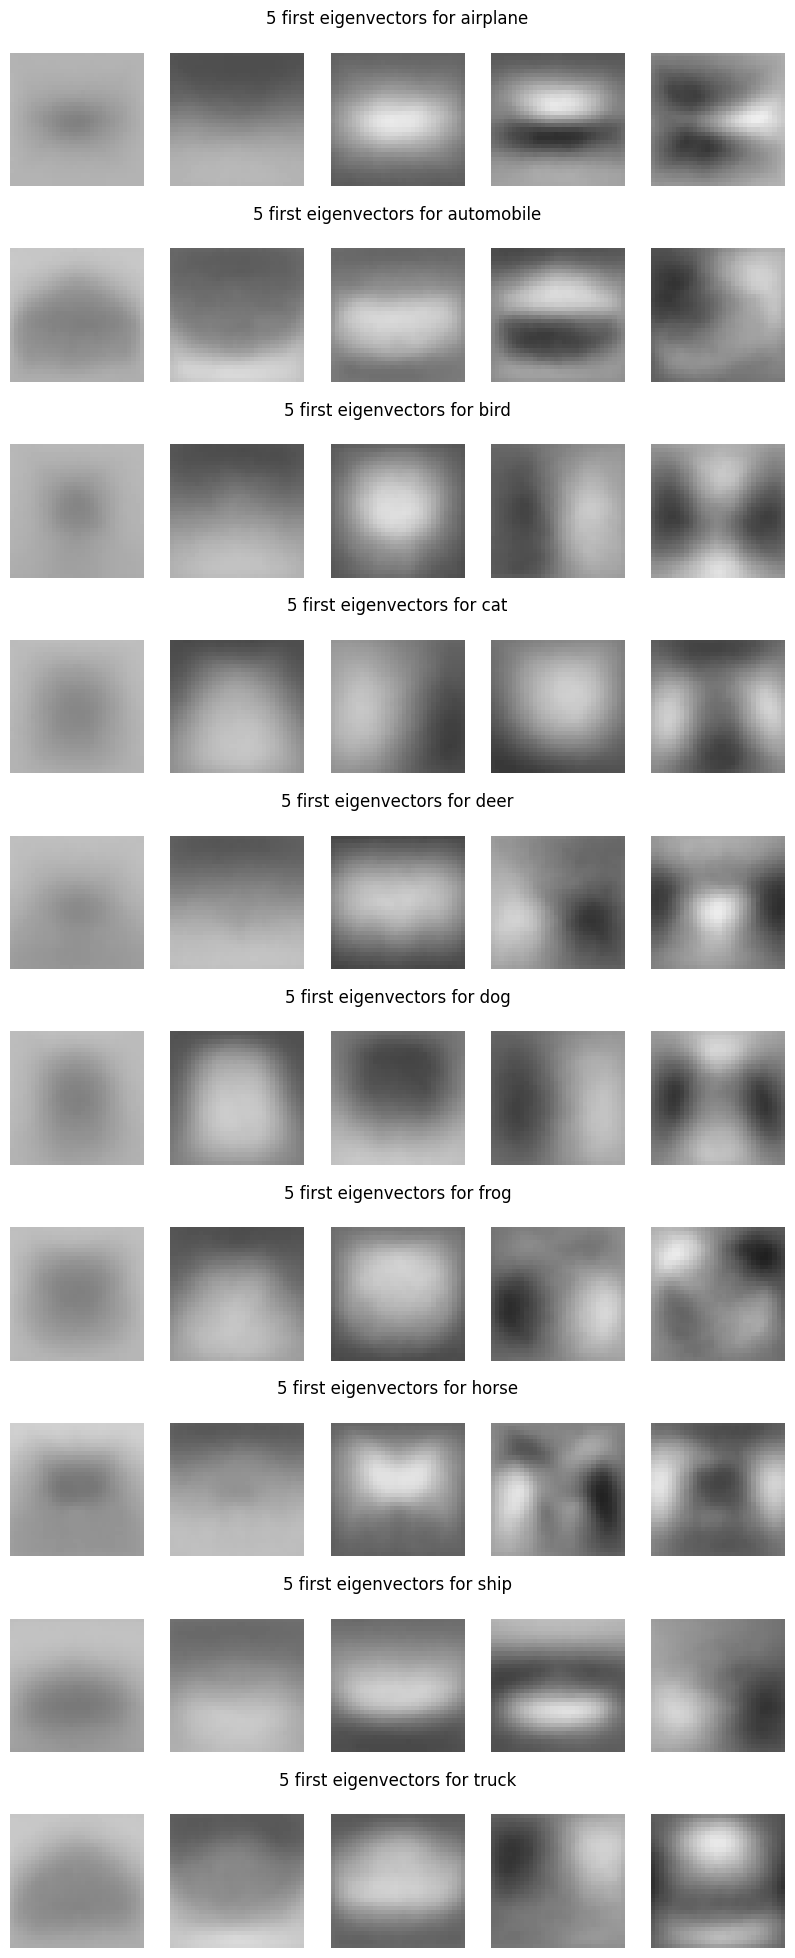

In [ ]:
plot_five_eigenvectors_with_names(all_eigenvectors_gray, 0, 50, max_contrast=0.2, gray=True)

There is little to be inferred from the pictures based on PCA. Still, in the case of the horse we see that one of the frames captures a silouette of a horse.

# how to use PCA:

In [1]:
from pca import compute_PCA

In [6]:
PCA_model = compute_PCA(training_data["data"], 10)

In [18]:
vectorized_images_test = vectorized_images(test_data["data"])
transformed_test_data = PCA_model.transform(vectorized_images_test)
transformed_test_data.shape

(10000, 10)